**Общая информация**

**Срок сдачи:** 29 марта 2021, 08:30 

**Штраф за опоздание:** по 1 баллу за 24 часа задержки. Через 5 дней домашнее задание сгорает.

При отправлении ДЗ указывайте фамилию в названии файла
Присылать ДЗ необходимо в виде ссылки на свой github репозиторий на почту ml1.sphere@mail.ru с указанием темы в следующем формате:

[ML0220, Задание 1] Фамилия Имя.

Используйте данный Ipython Notebook при оформлении домашнего задания.


**Штрафные баллы:**

1. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw1.ipynb) -0.5 баллов
2. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -0.5 баллов


In [1]:
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn import datasets
from sklearn.base import BaseEstimator
from sklearn.datasets import fetch_20newsgroups

from sklearn.model_selection import train_test_split, KFold
from sklearn.neighbors import KNeighborsClassifier, KDTree
from sklearn.metrics import accuracy_score, pairwise_distances

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [2]:
%matplotlib inline

##### Задание 1 (1 балл)
Реализовать KNN в классе MyKNeighborsClassifier (обязательное условие: точность не ниже sklearn реализации)
Разберитесь самостоятельно, какая мера расстояния используется в KNeighborsClassifier дефолтно и реализуйте свой алгоритм именно с этой мерой. 
Для подсчета расстояний можно использовать функции [отсюда](https://docs.scipy.org/doc/scipy/reference/spatial.distance.html)

In [3]:
class MyKNeighborsClassifier(BaseEstimator):
    
    def __init__(self, n_neighbors, algorithm='brute', metric='euclidean'):
        self.n_neighbors = n_neighbors
        self.algorithm = algorithm
        self.metric = metric
    
    def fit(self, X, y):
        if (self.algorithm == 'kd_tree'):
            self.X_train = KDTree(X, metric=self.metric)
        else:
            self.X_train = np.array(X)
        
        self.y_train = np.array(y)
        
        return self
    
    def predict(self, X):
        X = np.asarray(X)
        if (self.algorithm == 'kd_tree'):
            idxs_neighbors = self.X_train.query(X, k=self.n_neighbors, return_distance=False)
        else:
            cross_dists = pairwise_distances(X, self.X_train, metric=self.metric)
            idxs_neighbors = np.argpartition(cross_dists, self.n_neighbors, axis=-1)
            idxs_neighbors = idxs_neighbors[..., :self.n_neighbors]
        
        return np.apply_along_axis(self._vote_func, -1, idxs_neighbors)
    
    def _vote_func(self, x):
        values, counts = np.unique(self.y_train[x], return_counts=True)
        return values[counts.argmax()]


**IRIS**

В библиотеке scikit-learn есть несколько датасетов из коробки. Один из них [Ирисы Фишера](https://ru.wikipedia.org/wiki/%D0%98%D1%80%D0%B8%D1%81%D1%8B_%D0%A4%D0%B8%D1%88%D0%B5%D1%80%D0%B0)

In [4]:
iris = datasets.load_iris()

In [5]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

In [6]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='brute')
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='brute')

In [7]:
clf.fit(X_train, y_train)
my_clf.fit(X_train, y_train)

MyKNeighborsClassifier(n_neighbors=2)

In [8]:
sklearn_pred = clf.predict(X_test)
my_clf_pred = my_clf.predict(X_test)
assert abs( accuracy_score(y_test, my_clf_pred) -  accuracy_score(y_test, sklearn_pred ) )<0.005, "Score must be simillar"

**Задание 2 (0.5 балла)**

Давайте попробуем добиться скорости работы на fit, predict сравнимой со sklearn для iris. Допускается замедление не более чем в 2 раза. 
Для этого используем numpy. 

In [9]:
%time clf.fit(X_train, y_train)

Wall time: 999 µs


KNeighborsClassifier(algorithm='brute', n_neighbors=2)

In [10]:
%time my_clf.fit(X_train, y_train)

Wall time: 0 ns


MyKNeighborsClassifier(n_neighbors=2)

In [11]:
%time clf.predict(X_test)

Wall time: 2 ms


array([1, 0, 0, 1, 1, 1, 0, 2, 1, 2, 2, 1, 0, 0, 2])

In [12]:
%time my_clf.predict(X_test)

Wall time: 1e+03 µs


array([1, 0, 0, 1, 1, 1, 0, 2, 1, 2, 2, 1, 0, 0, 2])

###### Задание 3 (1 балл)
Добавьте algorithm='kd_tree' в реализацию KNN (использовать KDTree из sklearn.neighbors). Необходимо добиться скорости работы на fit,  predict сравнимой со sklearn для iris. Допускается замедление не более чем в 2 раза. 
Для этого используем numpy. Точность не должна уступать значению KNN из sklearn. 

In [13]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')

In [14]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

In [15]:
%time clf.fit(X_train, y_train)

Wall time: 992 µs


KNeighborsClassifier(algorithm='kd_tree', n_neighbors=2)

In [16]:
%time my_clf.fit(X_train, y_train)

Wall time: 0 ns


MyKNeighborsClassifier(algorithm='kd_tree', n_neighbors=2)

In [17]:
%time clf.predict(X_test)

Wall time: 1.99 ms


array([1, 2, 2, 0, 1, 0, 1, 1, 1, 0, 0, 2, 2, 0, 2])

In [18]:
%time my_clf.predict(X_test)

Wall time: 998 µs


array([1, 2, 2, 0, 1, 0, 1, 1, 1, 0, 0, 2, 2, 0, 2])

In [19]:
sklearn_pred = clf.predict(X_test)
my_clf_pred = my_clf.predict(X_test)
assert abs( accuracy_score(y_test, my_clf_pred) -  accuracy_score(y_test, sklearn_pred ) )<0.005, "Score must be simillar"

**Задание 4 (2.5 балла)**

Рассмотрим новый датасет 20 newsgroups

In [20]:
newsgroups = fetch_20newsgroups(subset='train',remove=['headers','footers', 'quotes'])

In [21]:
data = newsgroups['data']
target = newsgroups['target']

Преобразуйте текстовые данные из data с помощью [CountVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html). Словарь можно ограничить по частотности.

In [22]:
count_vectorizer = CountVectorizer(min_df=0.001, stop_words='english')
X_train_count = count_vectorizer.fit_transform(data).toarray()
X_train_count.shape

(11314, 9052)

*Так мы получили векторное представление наших текстов. Значит можно приступать к задаче обучения модели*

Реализуйте разбиение выборки для кросс-валидации на 3 фолдах. Разрешено использовать sklearn.cross_validation

In [23]:
kf = KFold(n_splits=3, shuffle=True, random_state=42)

In [24]:
def validate(estimator, X, y, kf):
    scores = np.zeros(kf.get_n_splits())

    for i, (idxs_train, idxs_val) in enumerate(kf.split(X)):
        X_train = X[idxs_train]
        X_val = X[idxs_val]
        y_train = y[idxs_train]
        y_val = y[idxs_val]

        estimator.fit(X_train, y_train)
        y_pred = estimator.predict(X_val)
        scores[i] = accuracy_score(y_val, y_pred)

        del X_train, X_val, y_train, y_val

    return scores

Напишите метод, позволяющий найти оптимальное количество ближайших соседей(дающее максимальную точность в среднем на валидации на 3 фолдах).
Постройте график зависимости средней точности от количества соседей. Можно рассмотреть число соседей от 1 до 10.

In [25]:
k_grid = np.arange(1, 20)

In [26]:
def KNN_search_optimal_k(X, y, cv, metric, grid=k_grid):
    k_scores = np.zeros(len(grid))

    for i, k in enumerate(grid):
        cls = MyKNeighborsClassifier(k, algorithm='brute', metric=metric)
        scores = validate(cls, X, y, cv)
        k_scores[i] = scores.mean()

    return k_scores.max(), grid[k_scores.argmax()], k_scores

In [27]:
best_score, best_k, count_eucl_scores = KNN_search_optimal_k(X_train_count, target, kf, 'euclidean')
print(f"Best k = {best_k} with score {best_score}")

Best k = 1 with score 0.2778855283278024


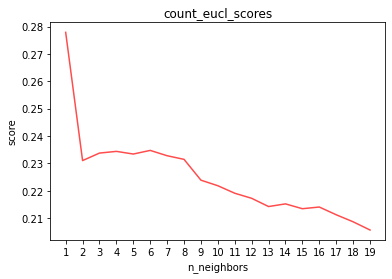

In [28]:
plt.title("count_eucl_scores")
plt.ylabel("score")
plt.xlabel("n_neighbors")
plt.plot(k_grid, count_eucl_scores, 'r', alpha=0.7)
_ = plt.xticks(k_grid)

In [29]:
best_score, best_k, count_cos_scores = KNN_search_optimal_k(X_train_count, target, kf, 'cosine')
print(f"Best k = {best_k} with score {best_score}")

Best k = 19 with score 0.5667308670596305


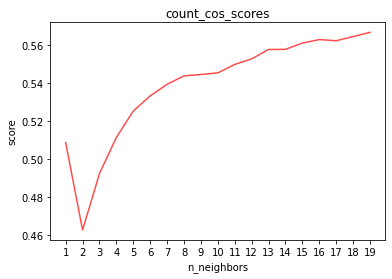

In [30]:
plt.title("count_cos_scores")
plt.ylabel("score")
plt.xlabel("n_neighbors")
plt.plot(k_grid, count_cos_scores, 'r', alpha=0.7)
_ = plt.xticks(k_grid)

In [31]:
tfidf_vectorizer = TfidfVectorizer(min_df=0.001, stop_words='english')
X_train_tfidf = tfidf_vectorizer.fit_transform(data).toarray()
X_train_tfidf.shape

(11314, 9052)

In [32]:
best_score, best_k, tfidf_eucl_scores = KNN_search_optimal_k(X_train_tfidf, target, kf, 'euclidean')
print(f"Best k = {best_k} with score {best_score}")

Best k = 1 with score 0.16625434154102878


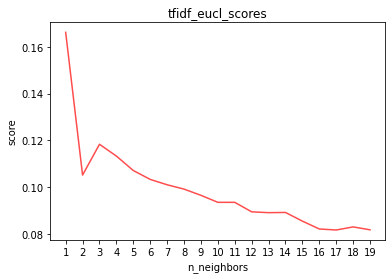

In [33]:
plt.title("tfidf_eucl_scores")
plt.ylabel("score")
plt.xlabel("n_neighbors")
plt.plot(k_grid, tfidf_eucl_scores, 'r', alpha=0.7)
_ = plt.xticks(k_grid)

In [34]:
best_score, best_k, tfidf_cos_scores = KNN_search_optimal_k(X_train_tfidf, target, kf, 'cosine')
print(f"Best k = {best_k} with score {best_score}")

Best k = 19 with score 0.6493723050059528


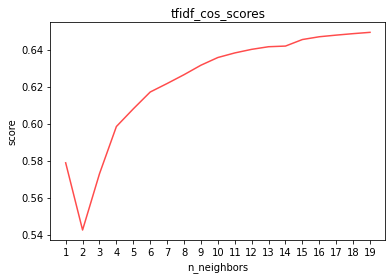

In [35]:
plt.title("tfidf_cos_scores")
plt.ylabel("score")
plt.xlabel("n_neighbors")
plt.plot(k_grid, tfidf_cos_scores, 'r', alpha=0.7)
_ = plt.xticks(k_grid)

Как изменится качество на валидации, если:

1. Используется косинусная метрика вместо евклидовой.
2. К текстам применяется TfIdf векторизацию( sklearn.feature_extraction.text.TfidfVectorizer)

Сравните модели, выберите лучшую.

По результатам валидации, лучшая модель - `tfidf` векторизация + `cosine` метрика. Заметим, что график не убывает, так что для этой модели запустим более широкий поиск оптимального `k`.

In [36]:
best_grid = np.arange(10, 100, 10)
best_score, best_k, best_scores = KNN_search_optimal_k(X_train_tfidf, target, 
                                                       kf, 'cosine', grid=best_grid)
print(f"Best k = {best_k} with score {best_score}")

Best k = 60 with score 0.660420415556236


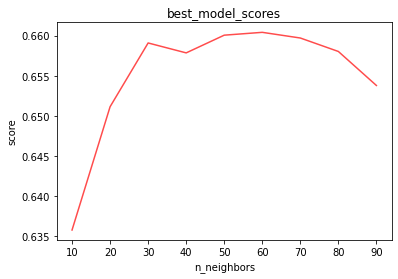

In [37]:
plt.title("best_model_scores")
plt.ylabel("score")
plt.xlabel("n_neighbors")
plt.plot(best_grid, best_scores, 'r', alpha=0.7)
_ = plt.xticks(best_grid)

In [38]:
best_cls = MyKNeighborsClassifier(n_neighbors=60, algorithm='brute', metric='cosine')

Загрузим  теперь test  часть нашей выборки и преобразуем её аналогично с train частью. Не забудьте, что наборы слов в train и test части могут отличаться.

In [39]:
newsgroups = fetch_20newsgroups(subset='test',remove=['headers','footers', 'quotes'])

In [40]:
data_test = newsgroups['data']
target_test = newsgroups['target']

Оценим точность вашей лучшей модели на test части датасета. Отличается ли оно от кросс-валидации? Попробуйте сделать выводы, почему отличается качество.

In [41]:
X_test = tfidf_vectorizer.transform(data_test).toarray()
X_test.shape

(7532, 9052)

In [42]:
best_cls.fit(X_train_tfidf, target)
target_pred = best_cls.predict(X_test)

In [43]:
print("Accuracy на тестовой выборке", accuracy_score(target_test, target_pred))

Accuracy на тестовой выборке 0.6224110462028678


Качество может отличаться из-за того, что при предсказывании на test части датасета мы учитываем только те слова, которые встречались в train части. Поэтому мы можем пропустить важные для предсказания слова, которые встречаются только в test. Также в train и test частях для одних и тех же слов могут быть разные частотности. Таким образом, чем меньше test похож на train, тем хуже модель будет работать, что и ожидаемо.